# Based on the Data set predict person is suffering from heart disease or not

Key Points :
    
* if you didn't get any function / method type : help(function_name)
* if you didn't get any function / method type : put your mouse curosr in between () and press --> Shift+Tab | Shift+Tab+Tab

### 1.) Importing Libraries & Data Analysis

Pandas : Pandas is a high-level data manipulation tool developed by Wes McKinney. It is built on the Numpy package and
          its key data structure is called the DataFrame. DataFrames allow you to store and manipulate tabular data in
          rows of observations and columns of variables.
            
            
Numpy  : NumPy, which stands for Numerical Python, is a library consisting of multidimensional array objects and a collection
          of routines for processing those arrays. Using NumPy, mathematical and logical operations on arrays can be performed.

        
matplot : Matplotlib is a plotting library for the Python programming language and its numerical mathematics extension NumPy.
           It provides an object-oriented API for embedding plots into applications using general-purpose GUI toolkits
           like Tkinter,wxPython, Qt, or GTK+.
        
        
seaborn : statistical data visualization. Seaborn is a Python data visualization library based on matplotlib.
           It provides a high-level interface for drawing attractive and informative statistical graphics.
        
        
%matplotlib inline : Use to show diagrams below the coding section. Call it only once.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
# calling our csv file (Your Dataset should be of CSV format)
# Steps to create your Excel file into CSV : Ctrl + S  } Format-->CSV

data = pd.read_csv("D:\corona\heart_Disease\heart.csv")
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


It's a clean, easy to understand set of data. However, the meaning of some of the column headers are not obvious.Here's what they mean,

1.)age: The person's age in years

2.)sex: The person's sex (1 = male, 0 = female)

3.)cp: The chest pain experienced (Value 1: typical angina, Value 2: atypical angina, Value 3: non-anginal pain,Value 4: asymptomatic)

4.)trestbps: The person's resting blood pressure (mm Hg on admission to the hospital)

5.)chol: The person's cholesterol measurement in mg/dl

6.)fbs: The person's fasting blood sugar (> 120 mg/dl, 1 = true; 0 = false)

7.)restecg: Resting electrocardiographic measurement (0 = normal, 1 = having ST-T wave abnormality,
                                        2 = showing probable or definite left ventricular hypertrophy by Estes' criteria)

8.)thalach: The person's maximum heart rate achieved

9.)exang: Exercise induced angina (1 = yes; 0 = no)

10.)oldpeak: ST depression induced by exercise relative to rest ('ST' relates to positions on the ECG plot. See more here)

11.)slope: the slope of the peak exercise ST segment (Value 1: upsloping, Value 2: flat, Value 3: downsloping)

12.)ca: The number of major vessels (0-3)

13.)thal: A blood disorder called thalassemia (3 = normal; 6 = fixed defect; 7 = reversable defect)

14.)target: Heart disease (0 = no, 1 = yes)

In [3]:
# Give an complete statistical description of the Data

data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [4]:
# Gives Complete information of the data values such as Number of Data present, Null or Not-Null, Data type

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
age         303 non-null int64
sex         303 non-null int64
cp          303 non-null int64
trestbps    303 non-null int64
chol        303 non-null int64
fbs         303 non-null int64
restecg     303 non-null int64
thalach     303 non-null int64
exang       303 non-null int64
oldpeak     303 non-null float64
slope       303 non-null int64
ca          303 non-null int64
thal        303 non-null int64
target      303 non-null int64
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


### 2.) Feature Engineering

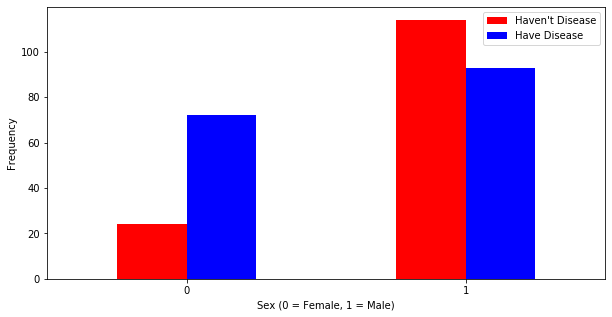

In [5]:
# This will show us people who suffer from heart desiese with respect to the sex i.e Male and Female

pd.crosstab(data.sex, data.target).plot(kind="bar",figsize=(10,5),color=['red','blue' ])

plt.xlabel('Sex (0 = Female, 1 = Male)')             # X-Label 

plt.xticks(rotation=0)                               #Get or set the current tick locations and labels of the x-axis.

plt.legend(["Haven't Disease", "Have Disease"])      # legend = Index

plt.ylabel('Frequency')                              # X-Label

plt.show()                                           # Help to show our diagram

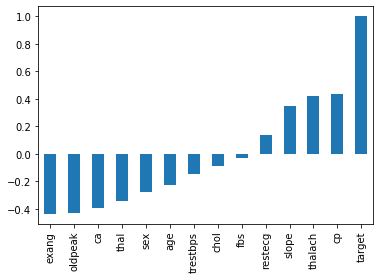

In [6]:
# This will show you the co-orelation between features respect to our target val

# .corr        : Help us to show the correlation between the values
# .sort_values : By default assendig = True
# .plot        : Use to plot
# kind=" "     : ‘bar’ or ‘barh’ for bar plots, ‘hist’ for histogram,‘box’ for boxplot,‘kde’ or ‘density’ for density plots,
#                area’ for area plots,‘scatter’ for scatter plots,‘hexbin’ for hexagonal bin plots,‘pie’ for pie plots

data.corr()['target'].sort_values().plot(kind='bar')

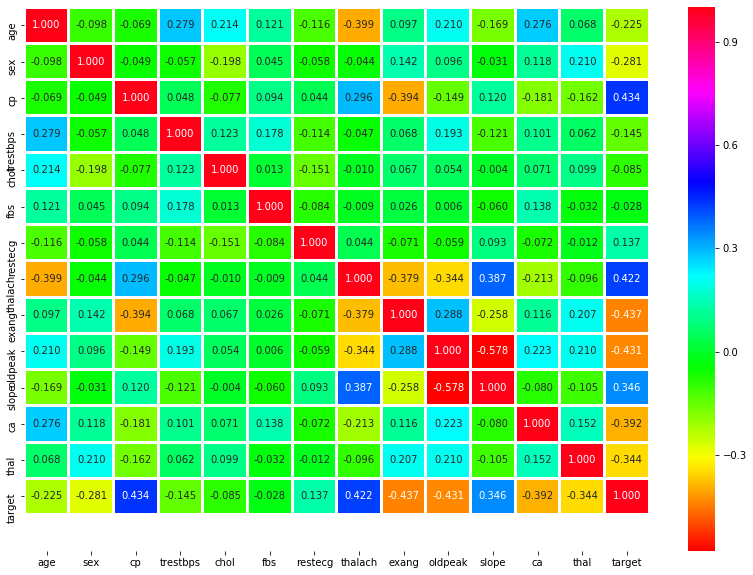

In [7]:
# This will give the correlation between that features

# Example : age in Y-axis and age in X-axis will have the maximum correlation that's why it's dark in color

plt.figure(figsize=(14,10))                                       # Help to set figure size                                     

sns.heatmap(data.corr(),annot=True,cmap='hsv',fmt='.3f',linewidths=2)    
         
# annot : Help to see the value in box
# cmap : The mapping from data values to color space.
# fmt : String formatting code to use when adding annotations.

plt.ylim(15,0)                                                     # show us exact number of values we want
plt.show()

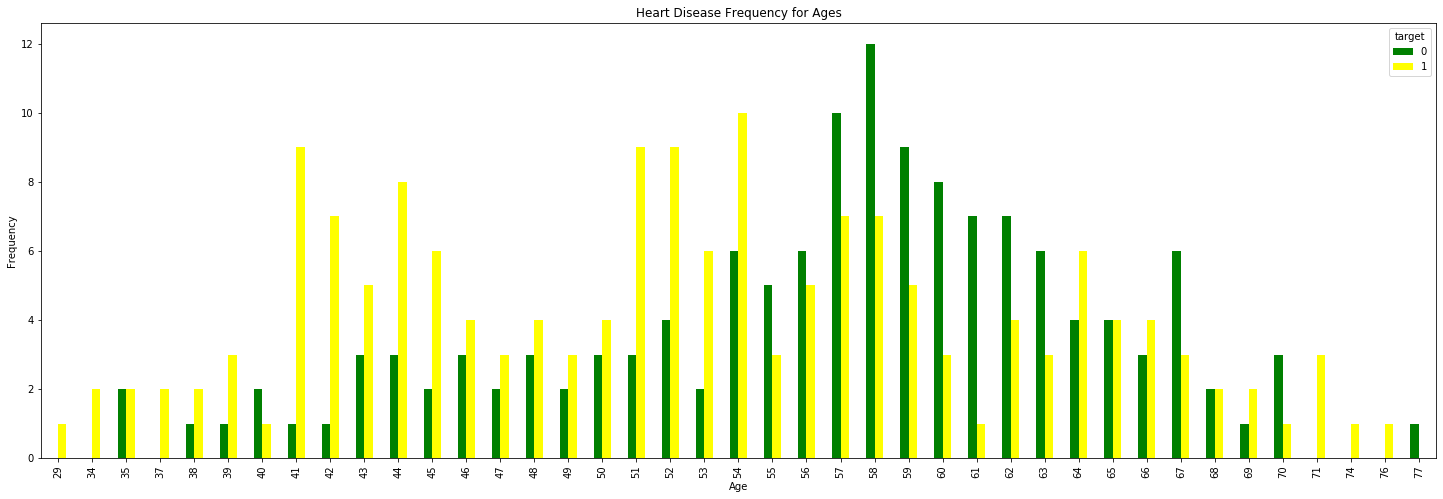

In [8]:
# This will show us Heart Disease Frequency for Ages

pd.crosstab(data.age,data.target).plot(kind="bar",figsize=(25,8),color=['green','yellow' ]) 

# Target : YES/NO
# color : Green / Yellow

plt.title('Heart Disease Frequency for Ages')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

#### Creating Dummy Variables for categorical data

Categorical Variables : Categorical Variables are the variables that falls into certain categories.
                         In Categorical Variable there is no order.

https://www.infinitycodex.in/dummy-variable-in-machine-learning-what }  Visit this if you want to know about dummy variables
https://www.infinitycodex.in/categoricaldummy-varibles-one-hot  }  Visit this if you want to know more about dummy variables

In [9]:
data = pd.get_dummies(data, columns=['cp','slope','thal','restecg'], drop_first=True)
data.head()

,age,sex,trestbps,chol,fbs,thalach,exang,oldpeak,ca,target,cp_1,cp_2,cp_3,slope_1,slope_2,thal_1,thal_2,thal_3,restecg_1,restecg_2
0,63,1,145,233,1,150,0,2.3,0,1,0,0,1,0,0,1,0,0,0,0
1,37,1,130,250,0,187,0,3.5,0,1,0,1,0,0,0,0,1,0,1,0
2,41,0,130,204,0,172,0,1.4,0,1,1,0,0,0,1,0,1,0,0,0
3,56,1,120,236,0,178,0,0.8,0,1,1,0,0,0,1,0,1,0,1,0
4,57,0,120,354,0,163,1,0.6,0,1,0,0,0,0,1,0,1,0,1,0


### 3.) Spliting Data into Training & Testing set

 The train_test_split function is for splitting a single dataset for two different purposes: training and testing.The testing 
 subset is for building your model.The testing subset is for using the model on unknown data to evaluate the performance of
 the model.


 train_test_split is a function in Sklearn model selection for splitting data arrays into two subsets: for training data and
 for testing data. With this function, you don't need to divide the dataset manually.By default,Sklearn train_test_split will
 make random partitions for the two subsets. However, you can also specify a random state for the operation.



 .values      : This returns back the numpy array
 
 X, y         : The first parameter is the dataset you're selecting to use.
 
 train_size   : This parameter sets the size of the training dataset. There are three options: None, which is the default,
                Int, which requires the exact number of samples, and float, which ranges from 0.1 to 1.0.
 
 test_size    : This parameter specifies the size of the testing dataset. The default state suits the training size.
                It will be set to 0.25 if the training size is set to default.
 
 random_state : The default mode performs a random split using np.random. Alternatively, you can add an integer using an
                exact number.

In [10]:
from sklearn.model_selection import train_test_split

X = data.drop('target', axis=1).values
y = data['target'].values

In [11]:
# https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html } for complete knowledge

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

### 4.) Normalization

Database normalization is the process of structuring a relational database in accordance with a series of so-called
 normal forms in order to reduce data redundancy and improve data integrity.



Transform features by scaling each feature to a given range.

MinMaxScaler : This estimator scales and translates each feature individually such that it is in the given range on 
               the training set, e.g. between zero and one.



By fit the imputer calculates the means of columns from some data, and by transform it applies those means to some data
(which is just replacing missing values with the means). If both these data are the same (i.e. the data for calculating the
means and the data that means are applied to) you can use fit_transform which is basically a fit followed by a transform.

In [12]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()


.fit : It help us to it simply calculate the parametersit needs to perform the actual scaling later on. So .fit actually
       calculate the Standard Deviation.

The only reason we are running .fit on training set is bcz we want to prevent what's known as data leakege from the test set.
We dont want to assume that we have prior info of the test set. So we only fit our scaler into the training set. So it dont
try to cheat and look into the test set


In [23]:
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

### 4.) Create & Compile our ANN Model

Sequential : is appropriate for a plain stack of layers where each layer has exactly one input tensor and one output
tensor. A Sequential model is not appropriate when: Your model has multiple inputs or multiple outputs. Any of your layers has
multiple inputs or multiple outputs.



Dense layer is the regular deeply connected neural network layer. It is most common and frequently used layer. 
Dense layer does the below operation on the input and return the output.


How to Choose an optimizer & loss?
--> It depends on what kind of problem we are trying to solve.

MULTI-CLASS CLASSIFICATION PROBLEM :
model.compile(optimizer="rmsprop", loss="categorical_crossentropy", metrics=['accuracy'])

BINARY CLASSIFICATION PROBLEM :
model.compile(optimizer="rmsprop", loss="binary_crossentropy", metrics=['accuracy'])

REGRESSION PROBLEM :
model.compile(optimizer="rmsprop", loss="mse")



relu  : Rectified Linear Unit 
https://machinelearningmastery.com/rectified-linear-activation-function-for-deep-learning-neural-networks/


In [13]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

model = Sequential()

model.add(Dense(100,activation='relu'))         # 100 : Number of neurons     We can also write it as : units = 100
model.add(Dense(50,activation='relu'))          # 50 : Number of neurons   
model.add(Dense(25,activation='relu'))          # 25 : Number of neurons
model.add(Dense(15,activation='relu'))          # 15 : Number of neurons
model.add(Dense(5,activation='relu'))           # 5 : Number of neurons

model.add(Dense(1,activation='sigmoid'))        # activation="sigmoid" : bcz it represents sigmoid curve i.e 1 or 0

# After each epochs of training our X_train we will run test data check our losses on the test data which will help us to keep
# track of how well our model is performing not just on our training data but also on our test data

model.compile(loss = "binary_crossentropy", optimizer = 'adam')

model.fit(x = X_train, y = y_train, epochs=950, validation_data=(X_test,y_test))

Train on 242 samples, validate on 61 samples
Epoch 1/950
242/242 [==============================] - 1s 4ms/sample - loss: 0.6871 - val_loss: 0.6716
Epoch 2/950
242/242 [==============================] - 0s 111us/sample - loss: 0.6752 - val_loss: 0.6501
Epoch 3/950
242/242 [==============================] - 0s 111us/sample - loss: 0.6592 - val_loss: 0.6208
Epoch 4/950
242/242 [==============================] - 0s 119us/sample - loss: 0.6372 - val_loss: 0.5722
Epoch 5/950
242/242 [==============================] - 0s 107us/sample - loss: 0.6081 - val_loss: 0.5097
Epoch 6/950
242/242 [==============================] - 0s 136us/sample - loss: 0.5761 - val_loss: 0.4650
Epoch 7/950
242/242 [==============================] - 0s 103us/sample - loss: 0.5536 - val_loss: 0.4436
Epoch 8/950
242/242 [==============================] - 0s 148us/sample - loss: 0.5421 - val_loss: 0.4374
Epoch 9/950
242/242 [==============================] - 0s 107us/sample - loss: 0.5285 - val_loss: 0.4556
Epoch 10/950

Epoch 78/950
242/242 [==============================] - 0s 99us/sample - loss: 0.1151 - val_loss: 0.4511
Epoch 79/950
242/242 [==============================] - 0s 111us/sample - loss: 0.1143 - val_loss: 0.4596
Epoch 80/950
242/242 [==============================] - 0s 103us/sample - loss: 0.1108 - val_loss: 0.4427
Epoch 81/950
242/242 [==============================] - 0s 111us/sample - loss: 0.1100 - val_loss: 0.4629
Epoch 82/950
242/242 [==============================] - 0s 115us/sample - loss: 0.1009 - val_loss: 0.4632
Epoch 83/950
242/242 [==============================] - 0s 103us/sample - loss: 0.0975 - val_loss: 0.4913
Epoch 84/950
242/242 [==============================] - 0s 109us/sample - loss: 0.0922 - val_loss: 0.4581
Epoch 85/950
242/242 [==============================] - 0s 103us/sample - loss: 0.0891 - val_loss: 0.5550
Epoch 86/950
242/242 [==============================] - 0s 103us/sample - loss: 0.0850 - val_loss: 0.5128
Epoch 87/950
242/242 [=========================

Epoch 155/950
242/242 [==============================] - 0s 115us/sample - loss: 0.0038 - val_loss: 1.0330
Epoch 156/950
242/242 [==============================] - 0s 98us/sample - loss: 0.0036 - val_loss: 1.0714
Epoch 157/950
242/242 [==============================] - 0s 107us/sample - loss: 0.0023 - val_loss: 0.9575
Epoch 158/950
242/242 [==============================] - 0s 111us/sample - loss: 0.0020 - val_loss: 0.9528
Epoch 159/950
242/242 [==============================] - 0s 103us/sample - loss: 0.0024 - val_loss: 1.0769
Epoch 160/950
242/242 [==============================] - 0s 107us/sample - loss: 0.0020 - val_loss: 1.0655
Epoch 161/950
242/242 [==============================] - 0s 128us/sample - loss: 0.0018 - val_loss: 1.0413
Epoch 162/950
242/242 [==============================] - 0s 107us/sample - loss: 0.0017 - val_loss: 1.0266
Epoch 163/950
242/242 [==============================] - 0s 120us/sample - loss: 0.0019 - val_loss: 1.0276
Epoch 164/950
242/242 [===============

242/242 [==============================] - 0s 111us/sample - loss: 4.8513e-04 - val_loss: 1.2235
Epoch 231/950
242/242 [==============================] - 0s 111us/sample - loss: 4.9081e-04 - val_loss: 1.2259
Epoch 232/950
242/242 [==============================] - 0s 111us/sample - loss: 5.5417e-04 - val_loss: 1.2286
Epoch 233/950
242/242 [==============================] - 0s 111us/sample - loss: 5.8332e-04 - val_loss: 1.2079
Epoch 234/950
242/242 [==============================] - 0s 111us/sample - loss: 4.3908e-04 - val_loss: 1.2173
Epoch 235/950
242/242 [==============================] - 0s 99us/sample - loss: 4.9142e-04 - val_loss: 1.2295
Epoch 236/950
242/242 [==============================] - 0s 120us/sample - loss: 4.5813e-04 - val_loss: 1.2341
Epoch 237/950
242/242 [==============================] - 0s 115us/sample - loss: 4.7102e-04 - val_loss: 1.2238
Epoch 238/950
242/242 [==============================] - 0s 107us/sample - loss: 4.5116e-04 - val_loss: 1.2303
Epoch 239/950
24

242/242 [==============================] - 0s 103us/sample - loss: 2.0742e-04 - val_loss: 1.3396
Epoch 305/950
242/242 [==============================] - 0s 103us/sample - loss: 2.1255e-04 - val_loss: 1.3598
Epoch 306/950
242/242 [==============================] - 0s 107us/sample - loss: 2.2265e-04 - val_loss: 1.3469
Epoch 307/950
242/242 [==============================] - 0s 103us/sample - loss: 2.0767e-04 - val_loss: 1.3568
Epoch 308/950
242/242 [==============================] - 0s 111us/sample - loss: 1.9676e-04 - val_loss: 1.3472
Epoch 309/950
242/242 [==============================] - 0s 103us/sample - loss: 1.9407e-04 - val_loss: 1.3428
Epoch 310/950
242/242 [==============================] - 0s 103us/sample - loss: 1.9162e-04 - val_loss: 1.3502
Epoch 311/950
242/242 [==============================] - 0s 103us/sample - loss: 1.8981e-04 - val_loss: 1.3586
Epoch 312/950
242/242 [==============================] - 0s 99us/sample - loss: 2.0001e-04 - val_loss: 1.3677
Epoch 313/950
24

242/242 [==============================] - 0s 115us/sample - loss: 1.0097e-04 - val_loss: 1.4559
Epoch 379/950
242/242 [==============================] - 0s 107us/sample - loss: 9.7146e-05 - val_loss: 1.4512
Epoch 380/950
242/242 [==============================] - 0s 103us/sample - loss: 1.0079e-04 - val_loss: 1.4423
Epoch 381/950
242/242 [==============================] - 0s 103us/sample - loss: 9.9588e-05 - val_loss: 1.4452
Epoch 382/950
242/242 [==============================] - 0s 103us/sample - loss: 9.8045e-05 - val_loss: 1.4655
Epoch 383/950
242/242 [==============================] - 0s 107us/sample - loss: 9.4770e-05 - val_loss: 1.4679
Epoch 384/950
242/242 [==============================] - 0s 115us/sample - loss: 9.7258e-05 - val_loss: 1.4684
Epoch 385/950
242/242 [==============================] - 0s 103us/sample - loss: 9.3681e-05 - val_loss: 1.4598
Epoch 386/950
242/242 [==============================] - 0s 107us/sample - loss: 9.7677e-05 - val_loss: 1.4677
Epoch 387/950
2

Epoch 452/950
242/242 [==============================] - 0s 111us/sample - loss: 5.6543e-05 - val_loss: 1.5466
Epoch 453/950
242/242 [==============================] - 0s 115us/sample - loss: 5.3571e-05 - val_loss: 1.5487
Epoch 454/950
242/242 [==============================] - 0s 103us/sample - loss: 5.2982e-05 - val_loss: 1.5456
Epoch 455/950
242/242 [==============================] - 0s 107us/sample - loss: 5.4208e-05 - val_loss: 1.5391
Epoch 456/950
242/242 [==============================] - 0s 110us/sample - loss: 5.2896e-05 - val_loss: 1.5494
Epoch 457/950
242/242 [==============================] - 0s 111us/sample - loss: 5.2646e-05 - val_loss: 1.5499
Epoch 458/950
242/242 [==============================] - 0s 111us/sample - loss: 5.2605e-05 - val_loss: 1.5597
Epoch 459/950
242/242 [==============================] - 0s 107us/sample - loss: 5.2926e-05 - val_loss: 1.5533
Epoch 460/950
242/242 [==============================] - 0s 128us/sample - loss: 5.0747e-05 - val_loss: 1.5528
E

Epoch 526/950
242/242 [==============================] - 0s 120us/sample - loss: 3.3533e-05 - val_loss: 1.6091
Epoch 527/950
242/242 [==============================] - 0s 115us/sample - loss: 3.2904e-05 - val_loss: 1.6169
Epoch 528/950
242/242 [==============================] - 0s 111us/sample - loss: 3.2717e-05 - val_loss: 1.6225
Epoch 529/950
242/242 [==============================] - 0s 111us/sample - loss: 3.2023e-05 - val_loss: 1.6261
Epoch 530/950
242/242 [==============================] - 0s 136us/sample - loss: 3.2456e-05 - val_loss: 1.6205
Epoch 531/950
242/242 [==============================] - 0s 120us/sample - loss: 3.3197e-05 - val_loss: 1.6284
Epoch 532/950
242/242 [==============================] - 0s 107us/sample - loss: 3.4035e-05 - val_loss: 1.6328
Epoch 533/950
242/242 [==============================] - 0s 107us/sample - loss: 3.2223e-05 - val_loss: 1.6278
Epoch 534/950
242/242 [==============================] - 0s 115us/sample - loss: 3.0968e-05 - val_loss: 1.6255
E

Epoch 600/950
242/242 [==============================] - 0s 115us/sample - loss: 2.0290e-05 - val_loss: 1.6977
Epoch 601/950
242/242 [==============================] - 0s 107us/sample - loss: 2.0598e-05 - val_loss: 1.6979
Epoch 602/950
242/242 [==============================] - 0s 107us/sample - loss: 1.9922e-05 - val_loss: 1.6945
Epoch 603/950
242/242 [==============================] - 0s 99us/sample - loss: 1.9772e-05 - val_loss: 1.6933
Epoch 604/950
242/242 [==============================] - 0s 115us/sample - loss: 2.0062e-05 - val_loss: 1.7019
Epoch 605/950
242/242 [==============================] - 0s 103us/sample - loss: 2.0115e-05 - val_loss: 1.7017
Epoch 606/950
242/242 [==============================] - 0s 111us/sample - loss: 1.9702e-05 - val_loss: 1.7073
Epoch 607/950
242/242 [==============================] - 0s 103us/sample - loss: 1.9388e-05 - val_loss: 1.7040
Epoch 608/950
242/242 [==============================] - 0s 107us/sample - loss: 1.9521e-05 - val_loss: 1.7008
Ep

Epoch 674/950
242/242 [==============================] - 0s 120us/sample - loss: 1.3374e-05 - val_loss: 1.7643
Epoch 675/950
242/242 [==============================] - 0s 114us/sample - loss: 1.3269e-05 - val_loss: 1.7655
Epoch 676/950
242/242 [==============================] - 0s 128us/sample - loss: 1.3431e-05 - val_loss: 1.7580
Epoch 677/950
242/242 [==============================] - 0s 115us/sample - loss: 1.3127e-05 - val_loss: 1.7625
Epoch 678/950
242/242 [==============================] - 0s 106us/sample - loss: 1.3218e-05 - val_loss: 1.7700
Epoch 679/950
242/242 [==============================] - 0s 103us/sample - loss: 1.2936e-05 - val_loss: 1.7694
Epoch 680/950
242/242 [==============================] - 0s 103us/sample - loss: 1.2939e-05 - val_loss: 1.7702
Epoch 681/950
242/242 [==============================] - 0s 111us/sample - loss: 1.2886e-05 - val_loss: 1.7696
Epoch 682/950
242/242 [==============================] - 0s 99us/sample - loss: 1.2828e-05 - val_loss: 1.7655
Ep

Epoch 748/950
242/242 [==============================] - 0s 107us/sample - loss: 9.0392e-06 - val_loss: 1.8101
Epoch 749/950
242/242 [==============================] - 0s 115us/sample - loss: 8.9350e-06 - val_loss: 1.8097
Epoch 750/950
242/242 [==============================] - 0s 120us/sample - loss: 8.8335e-06 - val_loss: 1.8185
Epoch 751/950
242/242 [==============================] - 0s 103us/sample - loss: 8.8358e-06 - val_loss: 1.8202
Epoch 752/950
242/242 [==============================] - 0s 111us/sample - loss: 8.6641e-06 - val_loss: 1.8238
Epoch 753/950
242/242 [==============================] - 0s 111us/sample - loss: 8.7813e-06 - val_loss: 1.8243
Epoch 754/950
242/242 [==============================] - 0s 103us/sample - loss: 8.6856e-06 - val_loss: 1.8301
Epoch 755/950
242/242 [==============================] - 0s 111us/sample - loss: 8.5274e-06 - val_loss: 1.8274
Epoch 756/950
242/242 [==============================] - 0s 120us/sample - loss: 8.7022e-06 - val_loss: 1.8238
E

Epoch 822/950
242/242 [==============================] - 0s 103us/sample - loss: 6.0358e-06 - val_loss: 1.8839
Epoch 823/950
242/242 [==============================] - 0s 103us/sample - loss: 6.1182e-06 - val_loss: 1.8863
Epoch 824/950
242/242 [==============================] - 0s 124us/sample - loss: 6.1114e-06 - val_loss: 1.8791
Epoch 825/950
242/242 [==============================] - 0s 107us/sample - loss: 6.0320e-06 - val_loss: 1.8884
Epoch 826/950
242/242 [==============================] - 0s 103us/sample - loss: 5.9641e-06 - val_loss: 1.8871
Epoch 827/950
242/242 [==============================] - 0s 107us/sample - loss: 5.9185e-06 - val_loss: 1.8915
Epoch 828/950
242/242 [==============================] - 0s 107us/sample - loss: 5.8758e-06 - val_loss: 1.8891
Epoch 829/950
242/242 [==============================] - 0s 103us/sample - loss: 5.8313e-06 - val_loss: 1.8934
Epoch 830/950
242/242 [==============================] - 0s 103us/sample - loss: 5.7964e-06 - val_loss: 1.8926
E

Epoch 896/950
242/242 [==============================] - 0s 107us/sample - loss: 4.1818e-06 - val_loss: 1.9513
Epoch 897/950
242/242 [==============================] - 0s 387us/sample - loss: 4.0962e-06 - val_loss: 1.9488
Epoch 898/950
242/242 [==============================] - 0s 173us/sample - loss: 4.0766e-06 - val_loss: 1.9488
Epoch 899/950
242/242 [==============================] - 0s 184us/sample - loss: 4.1827e-06 - val_loss: 1.9406
Epoch 900/950
242/242 [==============================] - 0s 157us/sample - loss: 4.0912e-06 - val_loss: 1.9414
Epoch 901/950
242/242 [==============================] - 0s 144us/sample - loss: 4.0136e-06 - val_loss: 1.9515
Epoch 902/950
242/242 [==============================] - 0s 144us/sample - loss: 4.0456e-06 - val_loss: 1.9551
Epoch 903/950
242/242 [==============================] - 0s 136us/sample - loss: 3.9916e-06 - val_loss: 1.9583
Epoch 904/950
242/242 [==============================] - 0s 144us/sample - loss: 4.0150e-06 - val_loss: 1.9526
E

Exploring what my model history looks like

model.history.history : Gives History of our losses 

loss = Loss of my training set
val_loss = Loss of my test set

In [14]:
losses = pd.DataFrame(model.history.history)
losses

,loss,val_loss
0,0.687057,0.671617
1,0.675227,0.650092
2,0.659234,0.620824
3,0.637160,0.572194
4,0.608137,0.509694
...,...,...
945,0.000003,1.989563
946,0.000003,1.992383
947,0.000003,1.988987
948,0.000003,1.996091


In [15]:
# Stop automatically stop training data based of a loss condition on the validation data passed during the model.fit()

from tensorflow.keras.callbacks import EarlyStopping


early_stop = EarlyStopping(monitor='val_loss',mode='min',verbose=1,patience=85) # verbose = 1 : we will see bunch of output

# patience : That means we will wait 85 epochs even after we detected a stopping point because of noice that could occur.  
# callbacks : This will prevent our model to overfitting

model.fit(x = X_train, y = y_train, epochs=950, validation_data=(X_test,y_test),callbacks=[early_stop])

Train on 242 samples, validate on 61 samples
Epoch 1/950
242/242 [==============================] - 0s 148us/sample - loss: 3.1171e-06 - val_loss: 1.9967
Epoch 2/950
242/242 [==============================] - 0s 140us/sample - loss: 3.1151e-06 - val_loss: 1.9971
Epoch 3/950
242/242 [==============================] - 0s 107us/sample - loss: 3.0805e-06 - val_loss: 1.9992
Epoch 4/950
242/242 [==============================] - 0s 107us/sample - loss: 3.1475e-06 - val_loss: 1.9947
Epoch 5/950
242/242 [==============================] - 0s 111us/sample - loss: 3.1560e-06 - val_loss: 2.0116
Epoch 6/950
242/242 [==============================] - 0s 115us/sample - loss: 3.2109e-06 - val_loss: 2.0032
Epoch 7/950
242/242 [==============================] - 0s 148us/sample - loss: 3.1267e-06 - val_loss: 2.0090
Epoch 8/950
242/242 [==============================] - 0s 132us/sample - loss: 3.1188e-06 - val_loss: 1.9991
Epoch 9/950
242/242 [==============================] - 0s 136us/sample - loss: 2.98

242/242 [==============================] - 0s 159us/sample - loss: 2.1658e-06 - val_loss: 2.0593
Epoch 76/950
242/242 [==============================] - 0s 157us/sample - loss: 2.1499e-06 - val_loss: 2.0580
Epoch 77/950
242/242 [==============================] - 0s 150us/sample - loss: 2.1378e-06 - val_loss: 2.0575
Epoch 78/950
242/242 [==============================] - 0s 152us/sample - loss: 2.1296e-06 - val_loss: 2.0610
Epoch 79/950
242/242 [==============================] - 0s 140us/sample - loss: 2.0956e-06 - val_loss: 2.0555
Epoch 80/950
242/242 [==============================] - 0s 171us/sample - loss: 2.1492e-06 - val_loss: 2.0555
Epoch 81/950
242/242 [==============================] - 0s 148us/sample - loss: 2.1084e-06 - val_loss: 2.0534
Epoch 82/950
242/242 [==============================] - 0s 140us/sample - loss: 2.0826e-06 - val_loss: 2.0590
Epoch 83/950
242/242 [==============================] - 0s 157us/sample - loss: 2.0858e-06 - val_loss: 2.0594
Epoch 84/950
242/242 [=

Exploring what my model history looks like

model.history.history : Gives History of our losses 


loss = Loss of my training set
val_loss = Loss of my test set

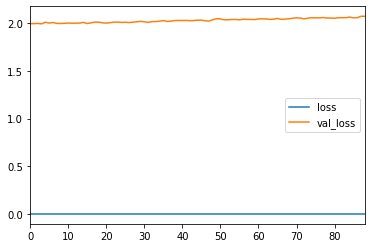

In [16]:
model_loss = pd.DataFrame(model.history.history)
model_loss.plot()

In [17]:
# Dropout help us to prevent overfitting



# Droupout : The term “dropout” refers to dropping out units (both hidden and visible) in a neural network.
# (0.5) is rate : Rate is the probability that we are going to randomly turnoff the actual neuron (0 : None, 1 : 100%)

# BackPropogation : Updating the weights and bias  

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

model1 = Sequential()

model1.add(Dense(100,activation='relu'))
model1.add(Dropout(0.5))
model1.add(Dense(50,activation='relu'))
model1.add(Dropout(0.5))
model1.add(Dense(25,activation='relu'))
model1.add(Dropout(0.5))
model1.add(Dense(15,activation='relu'))
model1.add(Dropout(0.5))
model1.add(Dense(5,activation='relu'))
model1.add(Dropout(0.5))

model1.add(Dense(1,activation='sigmoid'))    # sigmoid : Becasue it is a BINARY-CLASSIFICATION problem


# After each epochs of training our X_train we will run test data check our losses on the test data which will help us to keep
# track of how well our model is performing not just on our training data but also on our test data

model1.compile(loss = "binary_crossentropy",optimizer='adam')

model1.fit(x = X_train, y = y_train, epochs=950, validation_data=(X_test,y_test), callbacks=[early_stop])

Train on 242 samples, validate on 61 samples
Epoch 1/950
242/242 [==============================] - 1s 3ms/sample - loss: 0.7904 - val_loss: 0.6719
Epoch 2/950
242/242 [==============================] - 0s 161us/sample - loss: 0.7162 - val_loss: 0.6798
Epoch 3/950
242/242 [==============================] - 0s 148us/sample - loss: 0.7294 - val_loss: 0.6872
Epoch 4/950
242/242 [==============================] - 0s 169us/sample - loss: 0.7163 - val_loss: 0.6892
Epoch 5/950
242/242 [==============================] - 0s 144us/sample - loss: 0.7082 - val_loss: 0.6922
Epoch 6/950
242/242 [==============================] - 0s 161us/sample - loss: 0.7080 - val_loss: 0.6933
Epoch 7/950
242/242 [==============================] - 0s 169us/sample - loss: 0.6899 - val_loss: 0.6940
Epoch 8/950
242/242 [==============================] - 0s 152us/sample - loss: 0.6886 - val_loss: 0.6936
Epoch 9/950
242/242 [==============================] - 0s 173us/sample - loss: 0.6904 - val_loss: 0.6934
Epoch 10/950

Epoch 78/950
242/242 [==============================] - 0s 145us/sample - loss: 0.5258 - val_loss: 0.4533
Epoch 79/950
242/242 [==============================] - 0s 132us/sample - loss: 0.6192 - val_loss: 0.4688
Epoch 80/950
242/242 [==============================] - 0s 136us/sample - loss: 0.5461 - val_loss: 0.4798
Epoch 81/950
242/242 [==============================] - 0s 128us/sample - loss: 0.5461 - val_loss: 0.4699
Epoch 82/950
242/242 [==============================] - 0s 136us/sample - loss: 0.5320 - val_loss: 0.4644
Epoch 83/950
242/242 [==============================] - 0s 136us/sample - loss: 0.5339 - val_loss: 0.4647
Epoch 84/950
242/242 [==============================] - 0s 144us/sample - loss: 0.5258 - val_loss: 0.4676
Epoch 85/950
242/242 [==============================] - 0s 140us/sample - loss: 0.5755 - val_loss: 0.4661
Epoch 86/950
242/242 [==============================] - 0s 157us/sample - loss: 0.5398 - val_loss: 0.4647
Epoch 87/950
242/242 [========================

Epoch 155/950
242/242 [==============================] - 0s 136us/sample - loss: 0.4400 - val_loss: 0.4128
Epoch 156/950
242/242 [==============================] - 0s 136us/sample - loss: 0.3857 - val_loss: 0.3981
Epoch 157/950
242/242 [==============================] - 0s 144us/sample - loss: 0.3878 - val_loss: 0.3858
Epoch 158/950
242/242 [==============================] - 0s 132us/sample - loss: 0.4093 - val_loss: 0.3835
Epoch 159/950
242/242 [==============================] - 0s 144us/sample - loss: 0.3931 - val_loss: 0.3806
Epoch 160/950
242/242 [==============================] - 0s 128us/sample - loss: 0.4022 - val_loss: 0.3896
Epoch 161/950
242/242 [==============================] - 0s 132us/sample - loss: 0.3814 - val_loss: 0.3860
Epoch 162/950
242/242 [==============================] - 0s 139us/sample - loss: 0.4242 - val_loss: 0.3804
Epoch 163/950
242/242 [==============================] - 0s 132us/sample - loss: 0.4218 - val_loss: 0.3802
Epoch 164/950
242/242 [==============

242/242 [==============================] - 0s 132us/sample - loss: 0.3648 - val_loss: 0.4337
Epoch 232/950
242/242 [==============================] - 0s 136us/sample - loss: 0.3920 - val_loss: 0.4328
Epoch 233/950
242/242 [==============================] - 0s 140us/sample - loss: 0.2991 - val_loss: 0.4369
Epoch 234/950
242/242 [==============================] - 0s 132us/sample - loss: 0.3705 - val_loss: 0.4317
Epoch 235/950
242/242 [==============================] - 0s 136us/sample - loss: 0.3374 - val_loss: 0.4286
Epoch 236/950
242/242 [==============================] - ETA: 0s - loss: 0.444 - 0s 146us/sample - loss: 0.3352 - val_loss: 0.4161
Epoch 237/950
242/242 [==============================] - 0s 136us/sample - loss: 0.3377 - val_loss: 0.4067
Epoch 238/950
242/242 [==============================] - 0s 124us/sample - loss: 0.3721 - val_loss: 0.3989
Epoch 239/950
242/242 [==============================] - 0s 132us/sample - loss: 0.3206 - val_loss: 0.3892
Epoch 240/950
242/242 [====

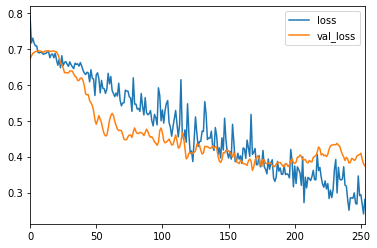

In [18]:
# Exploring what my model history looks like

# model.history.history : Gives History of our losses 


# loss = Loss of my training set
# val_loss = Loss of my test set

model1_loss = pd.DataFrame(model1.history.history)
model1_loss.plot()

In [19]:
# It will return our models loss

model1.evaluate(X_test,y_test,verbose=0)    # verbose = 0 : we will not see bunch of output  

0.3738649726891127

### 5.) Check Model Accuracy

In [20]:
pred = model1.predict_classes(X_test)

In [21]:
# To check the accuracy of the model : Column : f1-score , Row : accuracy --> 90%


from sklearn.metrics import classification_report, confusion_matrix

print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.85      0.92      0.88        24
           1       0.94      0.89      0.92        37

    accuracy                           0.90        61
   macro avg       0.89      0.90      0.90        61
weighted avg       0.90      0.90      0.90        61



In [22]:
# For detail explanation of confusion_matrix } https://www.infinitycodex.in/confusion-matrix-and-classification

# Our model only miss classify only 2 points in the test set.

print(confusion_matrix(y_test,pred))

[[22  2]
 [ 4 33]]


# Our Model is 90% accurate